## Question 1: Convolutional Neurat Network for MNIST Classification
Tasks:
 #### 1. Preprocessing Steps


In [1]:
# Import Neccesary Libraries
import numpy as  np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import  utils


In [2]:
import keras
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() # Load The Dataset

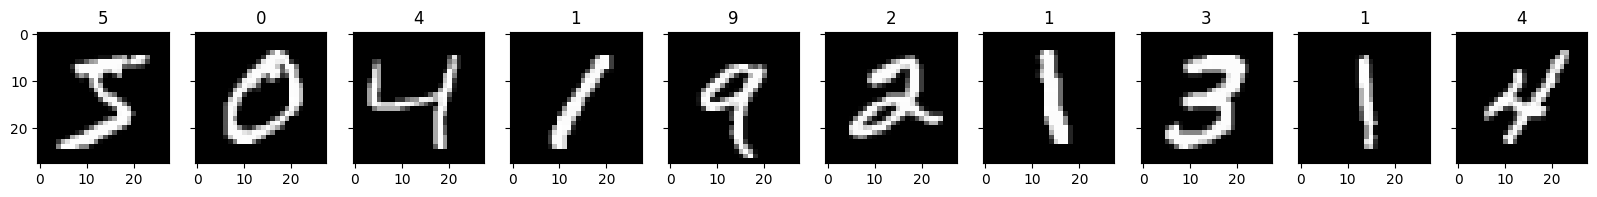

In [4]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()


In [5]:
y_train[0]


5

In [7]:
# Reshape the image 
x_train=x_train.reshape(x_train.shape[0],28,28,1) 
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
# Normalise the pixel value 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
 # Convert the labels to one-hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

#### 2 . Model Architecture

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # A  First Convolutional Layer
model.add(MaxPooling2D((2,2))) # Max Pooling of 2*2
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # Second Convolutional Layer
model.add(MaxPooling2D((2,2))) # Max Pooling of 2*2
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1))) # Third Convolutional Layer
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1))) # Fourth Convolutional Layer
model.add(Flatten()) # Flatten for final pooling Layer
model.add(Dense(128,activation='relu')) # Fully Connected Layer
model.add(Dense(50,activation='relu')) # Second Fully Connected Layer
model.add(Dense(50,activation='relu'))# Third Fully Connected Layer
model.add(Dense(10,activation='softmax')) # output

C:\Users\Gill\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

#### 3 . Training and Evaluation

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     # Train the model using Adam optimiser and categorical cross- entropy
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - accuracy: 0.8664 - loss: 0.4034 - val_accuracy: 0.9856 - val_loss: 0.0482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9833 - loss: 0.0554 - val_accuracy: 0.9851 - val_loss: 0.0476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9901 - val_loss: 0.0370
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9936 - loss: 0.0231 - val_accuracy: 0.9909 - val_loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9943 - loss: 0.0194 - val_accuracy: 0.9902 - val_loss: 0.0437
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.9898 - val_loss: 0.0423
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9959 -

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0722
Test Accuracy: 98.920%


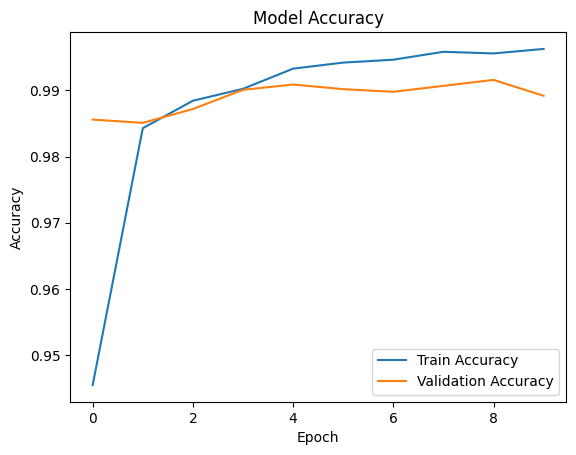

In [15]:
#  Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

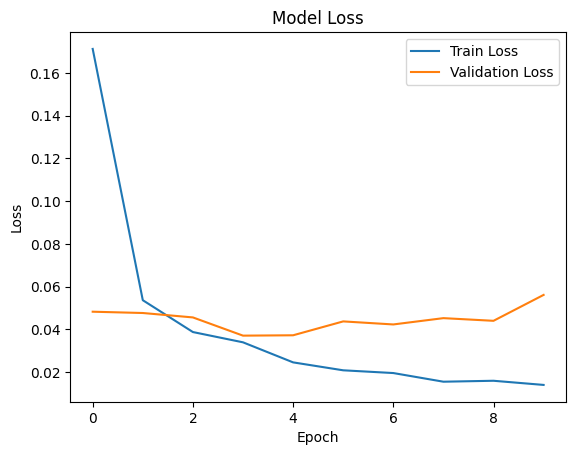

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
x=np.reshape(x_test[2],(1,28,28,1))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


1